In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Q1

In [2]:
# Gradient descent funtion to calculate optimal value of x
def gradient_descent(gradient, init_, learn_rate, n_iter=50, tol=1e-06):
    '''
    Parameters
    gradient - gradient funtion of a funtion to optimize
    init_ -  initial value of x
    learn_rate -  learning rate
    n_iter - Number of itteration
    '''
    x = init_
    for i in range(n_iter):
        delta = -learn_rate * gradient(x)
        if np.all(np.abs(delta) <= tol):
            break
        x += delta
    return round(x*1000)/1000

## Q1 A
Funtion 1.  $x^2+3x+4$

Funtion 2. $x^4-3x^2+2x$

In [3]:
def gradient_fun1(x):
    '''
    This funtion calculate value of gradient of funtion 1 (x^2 + 3x + 4) for 'x'.
    '''
    return (2*x + 3)

def gradient_fun2(x):
    '''
    This funtion calculate value of gradient of funtion 2 (x^4 - 3x^2 + 2x) for 'x'.
    '''
    return (4*x**3 - 6*x + 2)


Minima for funtion $x^2+3x+4$

In [4]:
minima = gradient_descent(gradient_fun1, 0, 0.1, n_iter=50, tol=1e-06)
print("Minima for funtion  (𝑥^2 + 3𝑥 + 4) is at {} ".format(minima))

Minima for funtion  (𝑥^2 + 3𝑥 + 4) is at -1.5 


Minima for funtion $x^4-3x^2+2x$

In [5]:
minima = gradient_descent(gradient_fun2, 0, 0.1, n_iter=50, tol=1e-06)
print("Minima for funtion  (𝑥^4 - 3𝑥^2 + 2x) is at {} ".format(minima))

Minima for funtion  (𝑥^4 - 3𝑥^2 + 2x) is at -1.366 


# Q1 B

#### In liner regression we minima for loss funtion

### $$ Loss Function = \frac{1}{n} \sum_{i=1}^{n} ( \hat y_i - (aX_i + b) )^2 $$

Where,
$\hat y$ is actual value, And $ (aX_n + b) $ is predicted value

To find optimal value for a and b. We partial derivation with respect to a and b

### $$ \displaystyle \frac{\partial l}{\partial a} = \frac{-2}{n} \sum_{i=1}^{n} X_i (\hat y_i - (aX_i + b)) $$
### $$ \displaystyle \frac{\partial l}{\partial b} = \frac{-2}{n} \sum_{i=1}^{n} (\hat y_i - (aX_i + b)) $$

In [6]:
def gradient(X,y,a,b):
    '''
    This funtion takes gradient of loss funtion of linear regression with respect to 'a' and 'b'.
    Paremeter-
    X, y - data
    a, b - hyperparameter
    
    returns - gradient of hyperparameter a and b.
    '''
    n = len(X)
    gradient_a = (-2/n) * sum( X * ( y - (a*X + b) ))
    gradient_b = (-2/n) * sum( y - (a*X + b) )
    return gradient_a, gradient_b

## Q1 C

#### Genrate data

In [7]:
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y = 2 + 0.3 * X + res

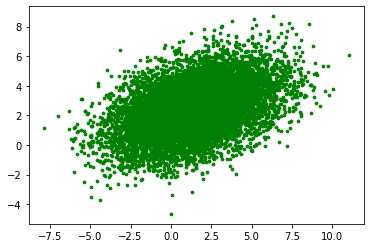

In [8]:
# plot data
plt.scatter(X, y,color= "green",
            marker= ".", s=30)
plt.show()

In [9]:
# Funtion to calculate loss for linear regression.
def loss_funtion(X,y,a,b):
    return sum((y - (a*X + b))**2)/len(X)
    

In [10]:
# Gradient Descent funtion for linear regression
def gradientDescent(gradient,X,y, init_a,init_b, learn_rate, n_iter=50, tol=1e-06):
    '''
    Parameter -
    gradient - gradient funtion of a funtion to optimize
    X, y - data
    init_a - initial value of a
    init_b - initial value of b
    learn_rate - learning rate
    '''
    
    
    a = init_a
    b = init_b
    for i in range(n_iter):
        # calculate gradient
        gradient_a, gradient_b = gradient(X,y,a,b)

        delta_a = -learn_rate * gradient_a
        delta_b = -learn_rate * gradient_b
        if np.all(np.abs(delta_a) <= tol) and np.all(np.abs(delta_b) <= tol):
            break
        
        # update a and b.
        a += delta_a
        b += delta_b
    return (round(a*1000)/1000),(round(b*1000)/1000)

__perform gradient descent on X,y with learning rate 0.01 and 500 iteration__

In [11]:
# Gradient Descent 
a,b = gradientDescent(gradient,X,y, 0,0, 0.01, n_iter=500, tol=1e-06)
print("(a,b) = ({},{})".format(a,b))


(a,b) = (0.296,2.022)


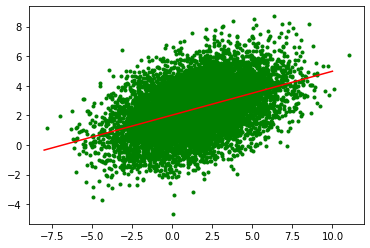

In [12]:
plt.scatter(X, y,color= "green",marker= ".")
x1 = np.linspace(-8,10,10000)
y1 = a*x1+b
plt.plot(x1, y1, '-r')
plt.show()


## Q1 D

Minibatch stochastic gradient descent

In [13]:
# Funtion select batch of data at random
def minbatch(X,y,batch_size):
    XY = np.vstack((X, y)).T
    random_indices = np.random.choice(len(X), size=batch_size, replace=False)
    random_rows = XY[random_indices, :]
    x_min , y_min = np.hsplit(random_rows,2)
    
    return x_min.reshape(len(x_min)), y_min.reshape(len(y_min))

In [14]:
def minbatch_SGD(gradient,X,y, init_a,init_b,batch_size, learn_rate, n_iter=50, tol=1e-06):
    a = init_a
    b = init_b
    for i in range(n_iter):
        
        # select batch of data
        x_min , y_min = minbatch(X,y,batch_size)
        # calculate gradient 
        gradient_a, gradient_b = gradient(x_min,y_min,a,b)
        
        
        delta_a = -learn_rate * gradient_a
        delta_b = -learn_rate * gradient_b
        if np.all(np.abs(delta_a) <= tol) and np.all(np.abs(delta_b) <= tol):
            break
            
        # update a and b    
        a += delta_a
        b += delta_b
    return (round(a*1000)/1000),(round(b*1000)/1000)

In [15]:
# Minbatch Gradient Descent
tic = time.time()
a,b = minbatch_SGD(gradient,X,y, init_a=0 , init_b=0 , batch_size=50 , learn_rate = 0.01, n_iter=500, tol=1e-06)
print("(a,b) = ({},{})".format(a,b))
toc = time.time()
print(toc - tic)

(a,b) = (0.332,2.034)
0.4636976718902588


## Q1 E

In [16]:
# Gradient Descent 
tic = time.time()
a,b = gradientDescent(gradient,X,y, 0,0, 0.01, n_iter=500, tol=1e-06)
print("(a,b) = ({},{})".format(a,b))
toc = time.time()
print(toc - tic)

(a,b) = (0.296,2.022)
2.3584213256835938


In [17]:
# Minbatch Gradient Descent
tic = time.time()
a,b = minbatch_SGD(gradient,X,y, init_a=0 , init_b=0 , batch_size=50 , learn_rate = 0.01, n_iter=500, tol=1e-06)
print("(a,b) = ({},{})".format(a,b))
toc = time.time()
print(toc - tic)

(a,b) = (0.317,2.014)
0.6475701332092285


In [18]:
# SGD
tic = time.time()
a,b = minbatch_SGD(gradient,X,y, init_a=0 , init_b=0 , batch_size=1 , learn_rate = 0.01, n_iter=500, tol=1e-06)
print("(a,b) = ({},{})".format(a,b))
toc = time.time()
print(toc - tic)

(a,b) = (-0.027,1.901)
0.5836100578308105


#### SGD is faster than Minbatch and Gradient Descent. As it takes single data at a time it is slitly faster but will takes more iteration to converge. Minbatch Gradient Descent give result quickly as compared to gradient decesent. Here batch size of 50 on learning rate 0.01 and number of iteration 500 minbatch Gradient descent give optimal result.   

___
# Q2

### 1. The probability that someone has both cold and a fever

>  Let denote __'Cold'__ by __'C'__  and __'Feaver'__ by __'F'__

#### $
P( C \cap F )\ = P(C) \times P(F)\\
\qquad\qquad  = 0.02 \times 0.307\\
\qquad\qquad  = 0.00614
$

### 2.  The probability that someone who has a cough has a cold

>   Let denote __'Cold'__ by __'C'__, __'Cough'__ by __'O'__ , __'Lund Disease'__ by __'D'__  and __'Smoke'__ by __'S'__

$$ 
P(C \,|\, O) =  \frac{P(O \,\cap\, C )}{P(O)} 
$$

__Where,__
$
\\
P(O \cap C ) = P(D \,\cap\, C \,\cap\, O)     \quad+\quad    P(\lnot D\, \,\cap\, C \,\cap\, O)
$



$
P(O) = P(D \,\cap\, C \,\cap\, O)    \quad+\quad     P(D \,\cap\, \lnot C\, \,\cap\, O) \quad+\quad 
           P(\lnot D\, \,\cap\, C \,\cap\, O) \quad+\quad P(\lnot D\, \,\cap\, \lnot C\, \,\cap\, O)    
$

> Now calculate required probability

1. __Probability of having Lund Disease__
$
P(D) = P(D \,|\, S) \times P(S) \quad+\quad P(D \,|\, \lnot S) \times P(\lnot S) \\
\qquad = 0.1009 \times 0.2 \quad+\quad 0.001 \times 0.8 \\
\qquad = 0.021
$

2. __Probability of having not Lund Disease__
$
P(\lnot D) = P(\lnot D \,|\, S) \times P(S) \quad+\quad P(\lnot D \,|\, \lnot S) \times P(\lnot S) \\
\qquad = 0.8991 \times 0.2 \quad+\quad 0.999 \times 0.8 \\
\qquad = 0.979
$

3. __Probability of having _Lund Disease_ And _Cold_ And _Cough_ .__
$
P(D \,\cap\, C \,\cap\, O) \;= P(D) \;\times\; P(C) \;\times\; P(O \;|\; D ,\, C)\\
\qquad\qquad\qquad = 0.021 \;\times\; 0.02 \;\times\; 0.7525 \\
\qquad\qquad\qquad = 3.1605 \times 10^{-4} 
$

4. __Probability of having _Lund Disease_ And not  _Cold_ And _Cough_ .__
$
P(D \,\cap\, \lnot C \,\cap\, O) \;= P(D) \;\times\; P(\lnot C) \;\times\; P(O \;|\; D ,\, \lnot C)\\
\qquad\qquad\qquad = 0.021 \;\times\; 0.98 \;\times\; 0.505 \\
\qquad\qquad\qquad = 0.0104
$

5. __Probability of not having _Lund Disease_ And having _Cold_ And _Cough_ .__
$
P(\lnot D \,\cap\, C \,\cap\, O) \;= P(\lnot D) \;\times\; P(C) \;\times\; P(O \;|\; \lnot D ,\, C)\\
\qquad\qquad\qquad = 0.979 \;\times\; 0.02 \;\times\; 0.505 \\
\qquad\qquad\qquad = 9.8879 \times 10^{-3} 
$

6. __Probability of not having _Lund Disease_ , _Cold_ And not having _Cough_ .__
$
P(\lnot D \,\cap\, \lnot C \,\cap\, O) \;= P(\lnot D) \;\times\; P(\lnot C) \;\times\; P(O \;|\; \lnot D ,\, \lnot C)\\
\qquad\qquad\qquad = 0.979 \;\times\; 0.98 \;\times\; 0.01 \\
\qquad\qquad\qquad = 9.5942 \times 10^{-3}
$

7. __Probability of having Cough__
$
P(O) = P(D \,\cap\, C \,\cap\, O)    \quad+\quad     P(D \,\cap\, \lnot C\, \,\cap\, O) \quad+\quad 
           P(\lnot D\, \,\cap\, C \,\cap\, O) \quad+\quad P(\lnot D\, \,\cap\, \lnot C\, \,\cap\, O)    \\
$
Now from 3, 4, 5 and 6
$
\\P(O) = 3.1605 \times 10^{-4} \quad+\quad 0.0104 \quad+\quad 9.8879 \times 10^{-3} \quad+\quad 9.5942 \times 10^{-3}
\\\qquad = 0.0302
$

8. __Now Probability of having Cough and Cold__
$
P(O \cap C ) = P(D \,\cap\, C \,\cap\, O)     \quad+\quad    P(\lnot D\, \,\cap\, C \,\cap\, O) \\
$
Now from 3, 4, 5 and 6
$
\\ P(O \cap C ) = 3.1605 \times 10^{-4} \quad+\quad  9.8879 \times 10^{-3}
\\\qquad = 0.0102
$

> ### Now the probability that someone who has a cough has a cold is.

#### $$ 
P(C \,|\, O) =  \frac{P(O \,\cap\, C )}{P(O)} = \frac{0.0102}{0.0302} = 0.3377
$$

___
# Q3

#### To derive MLE for the parameters of a k-sided multinomial distribution. Where multinomial distribution is given by

### $$
P(X_1 = x_1,..., X_k = x_k) = \frac{n!}{x_1!x_2!...x_k!}\times(p_1^{x_1}p_2^{x_2}...p_k^{x_k}) 
$$

#### Where,
#### 1. n is independent trial
#### 2. k is mutually exclusive outcomes
#### 3. $ \sum_{i=1}^{k} p_i = 1 $
#### 4. $ \sum_{i=1}^{k} x_i = n $

### Multinomial distribution can be written as
### $$
P(X_1 = x_1,..., X_k = x_k) = n! \prod_{i=1}^{k} \frac{p_i^{x_i}}{x_i!}
$$

#### Now Log Likelihood of multinomial distribution is
### $$
LL(\mathbf{p}) = log(n!) + log \prod_{i=1}^{k} \frac{p_i^{x_i}}{x_i!}\\
\qquad\qquad\qquad\qquad\;= log(n!) + \sum_{i=1}^{k} x_i log(p_i) - \sum_{i=1}^{k} log(x_i!)
$$

#### We us Lagrange multipliers due to constrain on multinomial distribution

### $$
L(\mathbf{p},\lambda) = log(n!) + \sum_{i=1}^{k} x_i log(p_i) - \sum_{i=1}^{k} log(x_i!) + \lambda (1 - \sum_{i=1}^{k} p_i)
$$

##### Where $\lambda$ is Lagrange multipliers.

#### Now to optimize the funtion L we take partial derivation with respect to $p_i$ and $\lambda$ 

## $
\frac{\partial L(p_i,\lambda)}{\partial p_i} = \frac{x_i}{p_i} - \lambda = 0
$

## $
\frac{\partial L(p_i,\lambda)}{\partial \lambda} = 1 - \sum_{i=1}^{k} p_i = 0
$

### From partial derivation of L with respect to $p_i$ we get
### $\lambda p_i = x_i$
#### then
### $\lambda \sum_{i=1}^{k} p_i = \sum_{i=1}^{k} x_i$
#### We know that $\sum_{i=1}^{k} p_i = 1 $ and $\sum_{i=1}^{k} x_i = n$
#### Then $\lambda$ = n

### Now MLE for multinomial distribution is 

### $$
P_{i_{MLE}} = \frac{x_i}{n}
$$